**<font size="5.5">Introduction to Recommendation Systems</font>**

With the growing amount of information on world wide web and with significant rise number of users, it becomes increasingly important for companies to search, map and provide personalized recommendations, content and services to them.

Companies nowadays are building smart and intelligent Recommendation Systems by studying the past behavior of their users. Hence providing them recommendations and choices of their interest in terms of “Relevant Job postings”, “Movies of Interest”, “Suggested Videos”, “Facebook friends that you may know” and “People who bought this also bought this” etc.

Two of the most popular ways to approach recommender systems are
* Collaborative filtering
    * User-Based Collaborative Filtering
    * Item-Based Collaborative Filtering
* Content-based recommendations.

**<font size="4.5">1. Importing Libraries.</font>**

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

**<font size="4.5">2. Reading and exploration of the data.</font>**

In [ ]:
data = Dataset.load_from_file('../input/ml-100k/u.data', reader= Reader())

ratings = pd.read_csv('../input/ml-100k/u.data', sep='\t', header=None)
ratings.columns = ['user_id', 'item_id', 'rating', 'timestamp']

In [ ]:
items_cols = ['movie_id' , 'movie_title' , 'release_date' , 'video_release_date' , 'IMDb_URL' , 'unknown|' , 'Action|' , 'Adventure|', 'Animation|', "Children's|", 'Comedy|', 'Crime|', 'Documentary|', 'Drama|',\
              'Fantasy|', 'Film-Noir|', 'Horror|', 'Musical|', 'Mystery|', 'Romance|', 'Sci-Fi|', 'Thriller|', \
              'War|', 'Western|']
movies = pd.read_csv('../input/ml-100k/u.item', sep='|', encoding='latin-1', names=items_cols, parse_dates=True, index_col='movie_id')

In [ ]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
ratings.shape

(100000, 4)

In [ ]:
movies.head()

,movie_title,release_date,video_release_date,IMDb_URL,unknown|,Action|,Adventure|,Animation|,Children's|,Comedy|,Crime|,Documentary|,Drama|,Fantasy|,Film-Noir|,Horror|,Musical|,Mystery|,Romance|,Sci-Fi|,Thriller|,War|,Western|
movie_id,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


**<font size="4.5"> 3. Data Visualization. </font>**

In [ ]:
uniq = ratings.user_id.unique()
len(uniq)

943

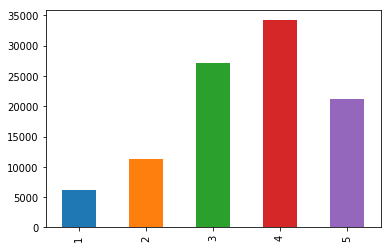

In [ ]:
ratings = ratings.rating
ratings.value_counts().sort_index().plot.bar()

In [ ]:
ratings.describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

**<font size="4.5"> 4. Model Application. </font>**

**<font size="4"> Random Model. </font>**

This algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal. This is one of the most basic algorithms.

In [ ]:
model_random = NormalPredictor()

In [ ]:
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5197  1.5194  1.5215  1.4993  1.5251  1.5170  0.0091  
Fit time          0.15    0.18    0.18    0.18    0.17    0.17    0.01    
Test time         0.28    0.16    0.15    0.25    0.15    0.20    0.06    


**<font size="4">User-Based Collaborative Filtering (UB-CF). </font>**

This algorithm takes a particular user, find users who have similar ratings, and then recommend items that those similar users liked.

To implement a user based collaborative filtering we will use the Nearest Neighbor algorithm. This algorithm needs three tasks:

1. Find the K-nearest neighbors (KNN), that are similar to the user A, using a similarity function to measure the distance between each pair of users.

2. Predict the rating that user A will give to all items the K neighbors have consumed but A has not.

3. Select top-n rated movies.

In [ ]:
model_user_based = KNNBasic(sim_options={'user_based': True})

In [ ]:
model_user_based_results = cross_validate(model_user_based, data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9783  0.9825  0.9774  0.9837  0.9694  0.9782  0.0050  
Fit time          0.52    0.52    0.51    0.48    0.50    0.51    0.01    
Test time         4.31    4.36    4.50    4.34    4.43    4.39    0.07    


**<font size="4">User-Based Collaborative Filtering (UB-CF). </font>**

In this approach, instead of focus on similar users to our user A, we will focus on what items from all the options, are more similar to what we know the user A enjoys.

The algorith will work in three tasks:

1. Calculate the similarity between any two items and fill up the item-item similarity matrix.

2. Predict the ratings of movies that are rated by user A.

3. Select top-n rated movies for A.

In [ ]:
model_item_based = KNNBasic(sim_options={'user_based': False})

In [ ]:
model_item_based_results = cross_validate(model_item_based, data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9756  0.9749  0.9718  0.9736  0.9751  0.9742  0.0013  
Fit time          0.79    0.78    0.73    0.71    0.73    0.75    0.03    
Test time         4.86    4.92    4.95    4.89    5.10    4.94    0.08    


**<font size="4">Matrix Factorization. </font>**

In the matrix factorization model the recommendations are based on the discovery of latent features of the interactions between users and items.

In [ ]:
model_mat_fac = SVD()

In [ ]:
model_mat_fac_results = cross_validate(model_mat_fac, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9316  0.9390  0.9371  0.9362  0.9399  0.9368  0.0029  
Fit time          6.04    6.04    6.07    6.03    6.04    6.04    0.01    
Test time         0.18    0.17    0.31    0.17    0.17    0.20    0.06    


**<font size="4.5"> 5. Comparison. </font>**

In [ ]:
means = [round(model_random_results['test_rmse'].mean(),4),round(model_user_based_results['test_rmse'].mean(),4), round(model_item_based_results['test_rmse'].mean(),4), round(model_mat_fac_results['test_rmse'].mean(),4)]
table = pd.Series(means, ['Random','User-based', 'Item-based', 'Matrix factorization'])
print("\t RMSE Means for each model\n")
print(table)

	 RMSE Means for each model

Random                  1.5170
User-based              0.9782
Item-based              0.9742
Matrix factorization    0.9368
dtype: float64


**<font size="4.5"> 6. Predictions. </font>**

In [ ]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, movies.loc[int(iid),'movie_title'], round(est,2)))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[2], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

In [ ]:
models = [model_random, model_user_based, model_item_based, model_mat_fac]

In [ ]:
listt = []
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    user = list(top_n.keys())[0]
    print('User:',user)
    print('Model:',model)
    table = pd.DataFrame(top_n[user], columns=['Movie ID','Movie Name', 'rating'])
    print(table)
    print('\n')


User: 196
Model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f45e53990f0>
  Movie ID                                         Movie Name  rating
0      465                            Jungle Book, The (1994)       5
1       86                     Remains of the Day, The (1993)       5
2     1014      Romy and Michele's High School Reunion (1997)       5
3       40  To Wong Foo, Thanks for Everything! Julie Newm...       5
4       32                                       Crumb (1994)       5


Computing the msd similarity matrix...
Done computing similarity matrix.
User: 196
Model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f45cca11438>
  Movie ID                     Movie Name  rating
0     1189             Prefontaine (1997)     5.0
1     1500      Santa with Muscles (1996)     5.0
2      814  Great Day in Harlem, A (1994)     5.0
3     1536           Aiqing wansui (1994)     5.0
4     1293                Star Kid (1997)     5.0


Computing t